<h2 align=center>Predicting Boston House-Prices in 1978</h2>

Here we use Linear regression to try and predict the house-prices, we also check if the variables in our data are dependent and try to see how that affects our prediction. 

We also try to see if there is any way to get a good prediction even if some predictor variables are dependent(Answer: Ridge Regression!)

##Data Description

Even though, it has a controversial history, the Boston house-price data is still useful for seeing how regression works.
 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.

Variables in order:</br>
 CRIM   -  per capita crime rate by town</br>
 ZN     -  proportion of residential land zoned for lots over 25,000. sq.ft.</br>
 INDUS  -  proportion of non-retail business acres per town</br>
 CHAS   -  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</br>
 NOX   -   nitric oxides concentration (parts per 10 million)</br>
 RM    -   average number of rooms per dwelling</br>
 AGE   -   proportion of owner-occupied units built prior to 1940</br>
 DIS   -   weighted distances to five Boston employment centres</br>
 RAD   -   index of accessibility to radial highways</br>
 TAX   -   full-value property-tax rate per 10,000 USD</br>
 PTRATIO-  pupil-teacher ratio by town</br>
 B     -   1000*(Bk - 0.63)^2, where Bk is the proportion of blacks by town</br>
 LSTAT -   lower status of the population</br>
 Price  -   Median value of owner-occupied homes in $1000's</br>

Loading the required libraries

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [6]:
column_names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
boston_data=pd.DataFrame(data,columns = column_names)
boston_data['Price']=target
print(boston_data.shape)
boston_data.head(n=8)

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9


In [7]:
boston_data_feature=boston_data.drop('Price',axis=1)
boston_data_feature.head(n=8)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43


In [8]:
boston_data_target=boston_data['Price']
boston_data_target.head(n=8)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
Name: Price, dtype: float64

We split the data into test and train set, we're gonna do Exploratory data analysis using the train set.

In [9]:
X_train,X_test,y_train,y_test=train_test_split(boston_data_feature,boston_data_target,
                                               test_size=0.3,random_state=6738)

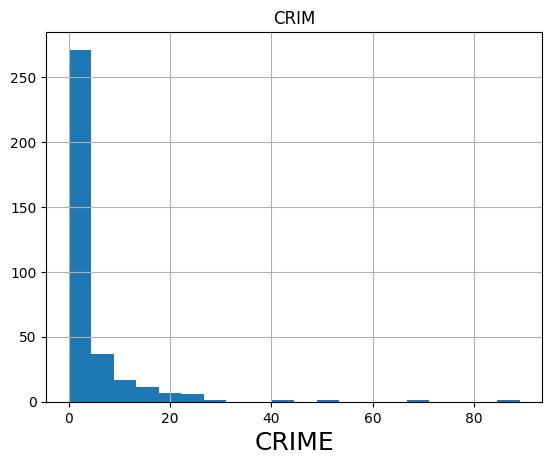

In [10]:
X_train.hist(column = 'CRIM', bins = 20)
plt.xlabel('CRIME', fontsize=18)
plt.show()

We plot the heatmap and correlation matrix together to see the relation between the feature variables.

<Axes: >

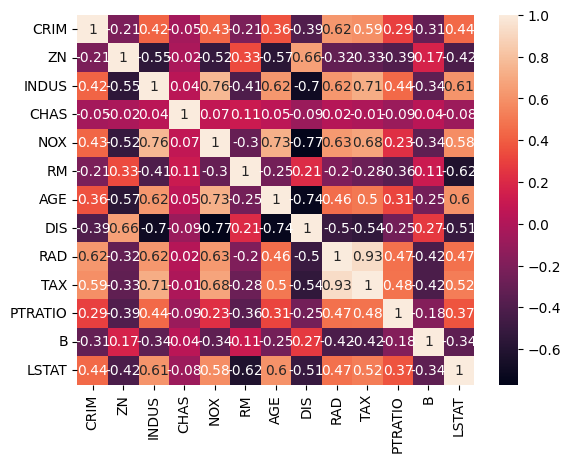

In [11]:
correlation_matrix = X_train.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

We can see that there are a few variables with |correlation| $\geq$ 0.5

In statistics, multicollinearity is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy.

One way to detect multicollinearity is variance inflation factor(VIF).
$${\mathrm {tolerance}}=1-R_{{j}}^{2},\quad {\mathrm {VIF}}={\frac {1}{{\mathrm {tolerance}}}},$$
where $R_{{j}}^{2}$ is the coefficient of determination of a regression of explanator $j$ on all the other explanators. A tolerance of less than 0.20 or 0.10, a VIF of 5 or 10 and above, or both, indicates a multicollinearity problem.

In [12]:
p=X_train.shape[1]
print(p)
vif = [variance_inflation_factor(X_train.values, i) for i in range(p)]
vif = pd.Series(vif,index=X_train.columns)
print(vif)

13
CRIM        2.072010
ZN          2.768058
INDUS      13.706272
CHAS        1.141818
NOX        80.274020
RM         79.242925
AGE        21.383367
DIS        14.641810
RAD        18.098453
TAX        68.261808
PTRATIO    90.469381
B          20.039552
LSTAT      10.555388
dtype: float64


We see that there are a lot of features with VIF greater than 10.  INDUS,NOX,RM,....So, our prediction with linear regression won't be that accurate. Let's see how it will be:

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In-sample MSE is the average error when predicting house-price from train set, while, Out-sample MSE is the average error when predicting house-price from test set.
###We only care about the Out-sample MSE (That's the one where we validate our model on the test set)

In [14]:
y_train_pred = lr.predict(X_train)
train_lr_mse = mean_squared_error(y_train, y_train_pred)
print('--- Linear Regression ---')
print('In-sample MSE = ', round(train_lr_mse,2))
y_test_pred = lr.predict(X_test)
test_lr_mse = mean_squared_error(y_test, y_test_pred )
print('Out-sample MSE = ',round(test_lr_mse,2))

--- Linear Regression ---
In-sample MSE =  21.63
Out-sample MSE =  24.81


The simple ridge estimator is then given by 
$${\displaystyle {\hat {\beta }}_{R}=(\mathbf {X} ^{\mathsf {T}}\mathbf {X} +\alpha \mathbf {I} )^{-1}\mathbf {X} ^{\mathsf {T}}\mathbf {y} }$$


In sklearn, 'alpha' is the constant that multiplies the L2 term, controlling regularization strength. 'alpha' must be a non-negative float. We can get different predictions based on the 'alpha'

In [15]:
rr_low = Ridge(alpha=0.01)
rr_low.fit(X_train, y_train)

Ridge(alpha=0.01)

In [16]:
y_train_pred = rr_low.predict(X_train)
train_rr_low_mse = mean_squared_error(y_train, y_train_pred)
print('--- Ridge Regression with alpha = 0.01 ---')
print('In-sample MSE = ', round(train_rr_low_mse,2))
y_test_pred = rr_low.predict(X_test)
test_rr_low_mse = mean_squared_error(y_test, y_test_pred )
print('Out-sample MSE = ',round(test_rr_low_mse,2))

--- Ridge Regression with alpha = 0.01 ---
In-sample MSE =  21.63
Out-sample MSE =  24.8


In [17]:
rr_high = Ridge(alpha=100)
rr_high.fit(X_train, y_train)

Ridge(alpha=100)

In [18]:
y_train_pred = rr_high.predict(X_train)
train_rr_high_mse = mean_squared_error(y_train, y_train_pred)
print('--- Ridge Regression with alpha = 100 ---')
print('In-sample MSE = ', round(train_rr_low_mse,2))
y_test_pred = rr_high.predict(X_test)
test_rr_high_mse = mean_squared_error(y_test, y_test_pred )
print('Out-sample MSE = ',round(test_rr_high_mse,2))

--- Ridge Regression with alpha = 100 ---
In-sample MSE =  21.63
Out-sample MSE =  28.05


Here, for alpha = 0.01 we are getting a higher Out-sample MSE than that was seen for Linear Regression. So, we need to find a better 'alpha'.

In [19]:
regressor = RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10],store_cv_values=True)
regressor.fit(X_train, y_train)

RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10], store_cv_values=True)

In [20]:
cv_mse = np.mean(regressor.cv_values_, axis=0)
print(cv_mse)

[24.25431799 24.25424097 24.2535756  24.25564981 24.48863343 25.04209892]


In [21]:
# Best alpha
print(regressor.alpha_)

0.01


So giving just 6 possible values for finding the best alpha didn't work.

We give a more precise range 0.0001 to 0.0999 for finding the best alpha

In [22]:
alph= np.r_[1:1000]/10000
regressor = RidgeCV(alphas=alph, store_cv_values=True)
regressor.fit(X_train, y_train)

RidgeCV(alphas=array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024,
       0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032,
       0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004 ,
       0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0...
       0.0945, 0.0946, 0.0947, 0.0948, 0.0949, 0.095 , 0.0951, 0.0952,
       0.0953, 0.0954, 0.0955, 0.0956, 0.0957, 0.0958, 0.0959, 0.096 ,
       0.0961, 0.0962, 0.0963, 0.0964, 0.0965, 0.0966, 0.0967, 0.0968,
       0.0969, 0.097 , 0.0971, 0.0972, 0.0973, 0.0974, 0.0975, 0.0976,
       0.0977, 0.0978, 0.0979, 0.098 , 0.0981, 0.0982, 0.0983, 0.0984,
       0.0985, 0.0986, 0.0987, 0.0988, 0.0989, 0.099 , 0.0991, 0.0992,
       0.0993, 0.0994, 0.0995, 0.0996, 0.0997, 0.0998, 0.0999]),
        store_cv_values=True)

In [23]:
cv_mse = np.mean(regressor.cv_values_, axis=0)

Plotting might give a good idea.

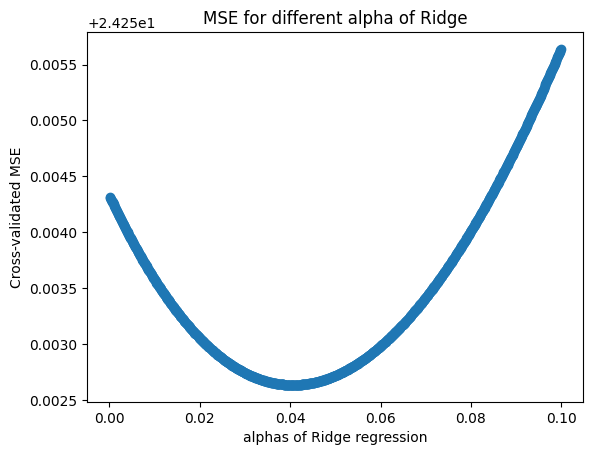

In [24]:
plt.scatter(alph, cv_mse);
plt.title('MSE for different alpha of Ridge')
plt.xlabel('alphas of Ridge regression')
plt.ylabel('Cross-validated MSE')
plt.show()

In [25]:
# Best alpha
best_alpha =regressor.alpha_
print(best_alpha)

0.0405


We found out that the best 'alpha' that can be used for our ridge regression model is 0.0405.

In [26]:
rr_best = Ridge(alpha=best_alpha)
rr_best.fit(X_train, y_train)

Ridge(alpha=0.0405)

In [27]:
y_train_pred = rr_best.predict(X_train)
train_rr_best_mse = mean_squared_error(y_train, y_train_pred)
print('--- Ridge Regression with best alpha ---')
print('In-sample MSE = ', round(train_rr_best_mse,2))
y_test_pred = rr_best.predict(X_test)
test_rr_best_mse = mean_squared_error(y_test, y_test_pred )
print('Out-sample MSE = ',round(test_rr_best_mse,2))

--- Ridge Regression with best alpha ---
In-sample MSE =  21.63
Out-sample MSE =  24.78


In [29]:
MSEdf = [['Linear regression',round(train_lr_mse,3),round(test_lr_mse,3)]
         ,['Ridge Regression a = 0.01',round(train_rr_low_mse,3),round(test_rr_low_mse,3)]
         ,['Ridge Regression a =100',round(train_rr_high_mse,3),round(test_rr_high_mse,3)]
         ,['Ridge Regression best a = 0.0405',round(train_rr_best_mse,3),round(test_rr_best_mse,3)]]
MSEdf = pd.DataFrame(MSEdf,columns=['Method','In-Sample MSE','Out-Sample MSE'])
print(MSEdf)

                             Method  In-Sample MSE  Out-Sample MSE
0                 Linear regression         21.627          24.806
1         Ridge Regression a = 0.01         21.627          24.800
2           Ridge Regression a =100         23.883          28.048
3  Ridge Regression best a = 0.0404         21.629          24.784


We can see the Out-sample MSE's for each case. We can see that the Out-Sample MSE is least for Ridge Regression with $\alpha$ = 0.405.

In [31]:
from sklearn.metrics import r2_score

# predicting the accuracy score
score=r2_score(y_test,y_test_pred)
print("R square of the fit is  ",score)

R square of the fit is   0.7273797003447193


##In Conclusion
We can predict the House-price correctly with a mean-squared error of 24.784(actual error or root mean squared error will therefore be 4.9784) with Ridge Regression.